<a href="https://colab.research.google.com/github/Tomaz4lves/Biblioteca_pandas/blob/main/data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Target:

#Churn — Cliente deu churn ou não

#Variáveis numéricas:

#Tenure — Número de meses que o cliente está na base
#MonthlyCharges — A quantia consumida por cliente mensalmente
#TotalCharges — A quantia consumida por cliente total

#Variáveis categóricas:

#CustomerID - Id do cliente
#Gender — M/F
#SeniorCitizen — Se o cidadão é ou não idoso (0,1)
#Partner — Se o cliente é ou não casado
#Dependents — Cliente tem dependentes (Yes, No)
#PhoneService — Cliente tem serviço telefonico (Yes, No)
#MulitpleLines — Se o cliente tem várias linhas ou não (Yes, No, No Phone Service)
#InternetService — Tipo do serviço de internet (DSL, Fiber Optic, None)
#OnlineSecurity — Se o cliente tem segurança online (Yes, No, No Internet Service)
#OnlineBackup — WSe o cliente tem Backup Online (Yes, No, No Internet Service)
#DeviceProtection — Se o cliente tem proteção do dispositivo (Yes, No, No Internet Service)
#TechSupport — Se o cliente tem suporte tecnológico (Yes, No, No Internet Service)
#StreamingTV — Se o cliente tem streaming de TV (Yes, No, No Internet Service)
#StreamingMovies — Se o cliente tem serviço de streaming de filmes (Yes, No, No Internet Service)
#Contract — Termo de contrato do cliente (Monthly, 1-Year, 2-Year)
#PaperlessBilling — Se o cliente tem ou não boleto sem papel (Yes, No)
#PaymentMethod — Método de pagamento do cliente(E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Importando base de dados

churn = pd.read_excel("churn_data.xlsx")
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# Entendo os dados

churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
# Informações dos dados

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [14]:
# Verificando valores ausentes

churn.isna().count()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
dtype: int64

In [15]:
# Contando a base de clientes por Churn e não Churn

churn_agg = churn.groupby("Churn")['customerID'].count().reset_index()
churn_agg = pd.DataFrame(churn_agg)
churn_agg

,Churn,customerID
0,No,5163
1,Yes,1869


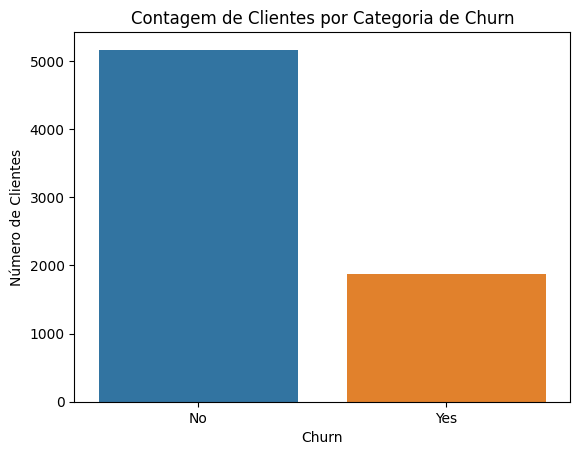

In [16]:
# Visualizando gráfico com contagem de clientes em cada categoria

sns.barplot(data=churn_agg, x = "Churn",y = "customerID")
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.title('Contagem de Clientes por Categoria de Churn')
plt.show()

In [57]:
# Contando a base de clientes e método de pagamento

churn_agg = churn.groupby("PaymentMethod")['customerID'].count().reset_index()
churn_agg = pd.DataFrame(churn_agg)
churn_agg_ordem = churn_agg.sort_values(by='customerID', ascending=False)
churn_agg

,PaymentMethod,customerID
0,Bank transfer (automatic),1542
1,Credit card (automatic),1521
2,Electronic check,2365
3,Mailed check,1604


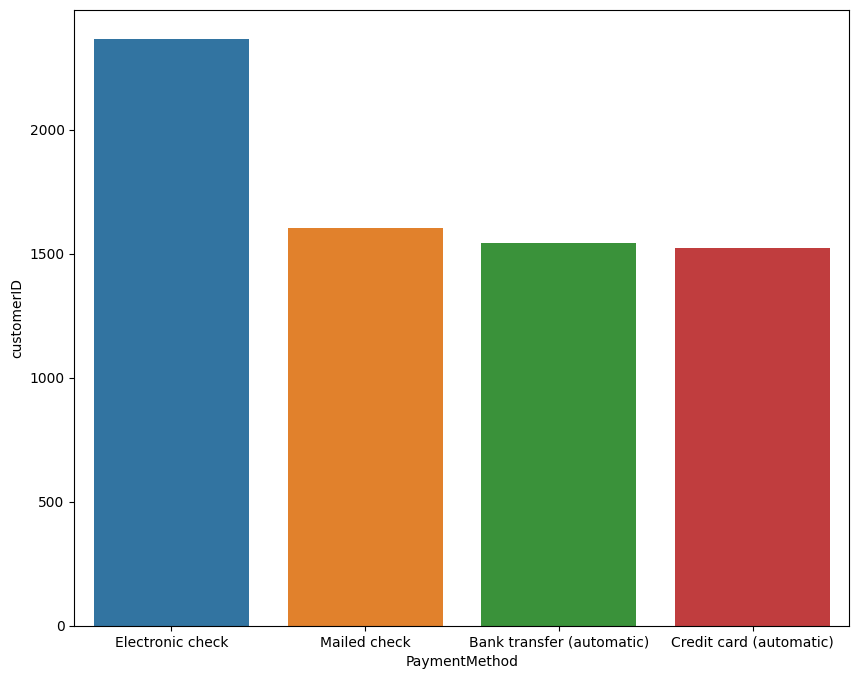

In [56]:
# Plotando gráfico com base de clientes por método de pagamento

plt.figure(figsize=[10,8])
sns.barplot(data=churn_agg_ordem, x = "PaymentMethod",y = "customerID");

In [19]:
# Contando o número de clientes por gênero

churn_agg_gender = churn.groupby("gender")['customerID'].count().reset_index()
churn_agg_gender = pd.DataFrame(churn_agg_gender)
churn_agg_gender

,gender,customerID
0,Female,3483
1,Male,3549


In [20]:
# Contando o número de clientes por churn e método de pagamento

churn_agg_pgt = churn.groupby(["Churn","PaymentMethod"])['customerID'].count().reset_index()
churn_agg_pgt.head()

,Churn,PaymentMethod,customerID
0,No,Bank transfer (automatic),1284
1,No,Credit card (automatic),1289
2,No,Electronic check,1294
3,No,Mailed check,1296
4,Yes,Bank transfer (automatic),258


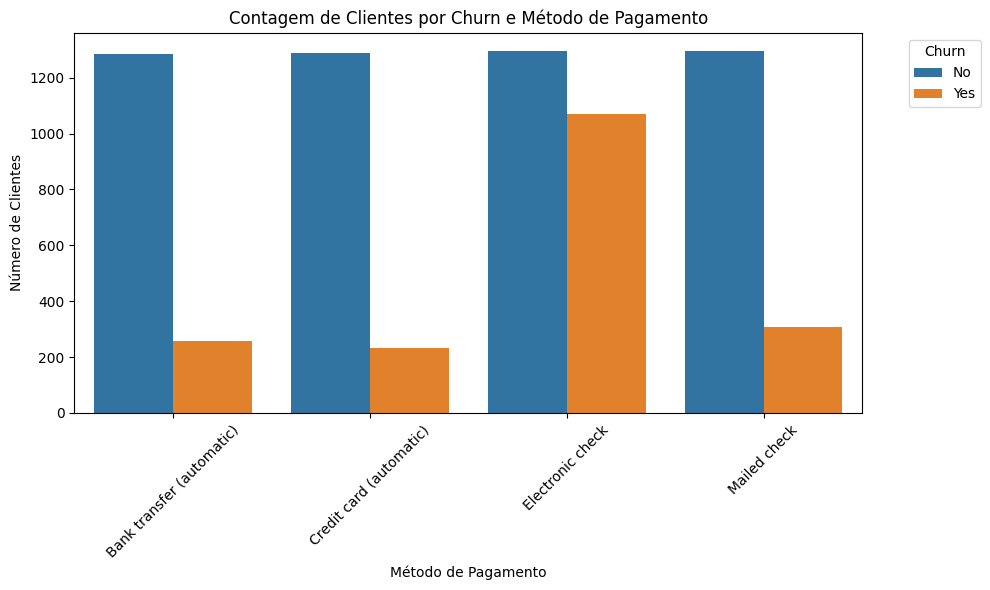

In [21]:
# Plotando gráfico com número de clientes por churn e método de pagamento

plt.figure(figsize=(10, 6))
sns.barplot(data=churn_agg_pgt, x="PaymentMethod", y="customerID", hue="Churn")
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.title('Contagem de Clientes por Churn e Método de Pagamento')
plt.xticks(rotation=45)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [22]:
# Analisando tipo de dados de cada coluna

churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [23]:
# Removendo ausentes

churn.dropna(inplace=True)

In [24]:
# Alterando tipo da coluna TotalCharges para float64

churn["TotalCharges"] = pd.to_numeric(churn["TotalCharges"],errors='coerce')

In [26]:
# Separando X e Y

X = churn.drop(columns=["customerID","Churn"], axis=1)
y = churn[["Churn"]]

In [27]:
# Aplicando LabelEncoder para transformar rotulos em valores numéricos

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.Churn)
y.Churn = le.transform(y.Churn)

<ipython-input-27-cbe79c16fd07>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Churn = le.transform(y.Churn)


In [28]:
# Aplicando Get Dummies para classificação One-Hot

X = pd.get_dummies(X)

In [29]:
# Aplicando processos de Sklearn e transformando dados para 0 e 1 e em dataframe

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X))

In [30]:
# Dividindo em treino e teste usando o Model Selection do Sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [31]:
# Inicando a Regressão Logística

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# Realizando previsões com o X_test

lr.predict(X_test)

array([0, 0, 0, ..., 1, 1, 0])

In [33]:
# Atribui as previsões e os dados de teste

X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
1822,0.0,0.619718,0.324876,0.267142,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
3075,0.0,0.014085,0.060199,0.002267,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
5116,0.0,0.338028,0.018408,0.053918,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
683,0.0,0.000000,0.525871,0.006035,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1
3535,0.0,0.676056,0.222886,0.236782,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201,0.0,0.070423,0.017413,0.010432,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
701,0.0,0.394366,0.663184,0.288184,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
5540,0.0,0.028169,0.792537,0.034214,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
6541,0.0,0.281690,0.874129,0.257460,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1


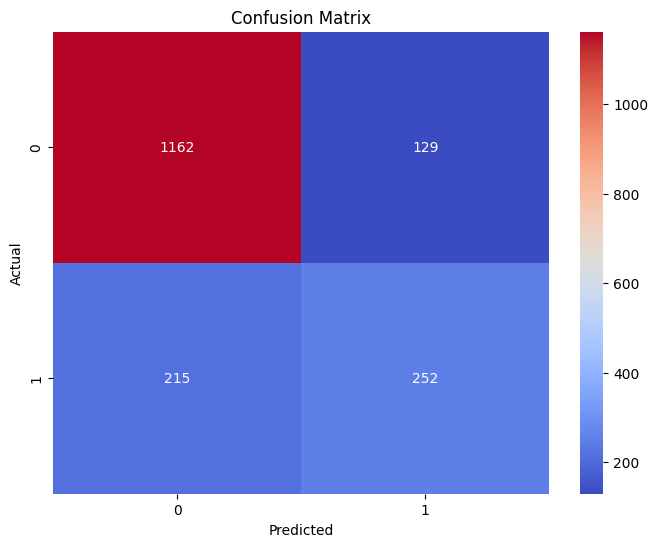

In [34]:
# Plotando Matriz de confusão com base nos dados de teste de Regressão Logística

from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# Avaliando desempenho da Regressão Logística

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8050815320439894
Acurácia (Teste): 0.8043230944254836
Acurácia Balanceada (Treino): 0.7252913488404995
Acurácia Balanceada (Teste): 0.7198460101808435
Precision (Treino): 0.6582064297800339
Precision (Teste): 0.6614173228346457
Recall (Treino): 0.5549215406562055
Recall (Teste): 0.5396145610278372
F1-Score (Treino): 0.6021671826625387
F1-Score (Teste): 0.5943396226415094
ROCAUC (Treino): 0.8486261693743296
ROCAUC (Teste): 0.8417358188878035


In [36]:
# Aplicando Random Forest para avaliar outros modelos

from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier()

In [37]:
# Treinando modelo do Random Forest

rf.fit(X_train, y_train)

<ipython-input-37-168a6fc83696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [38]:
# Realizando previsões com o X_test

rf.predict(X_test)

array([0, 0, 0, ..., 1, 1, 0])

In [39]:
# Atribui as previsões e os dados de teste

X_test.assign(churn = y_test).assign(label = rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
1822,0.0,0.619718,0.324876,0.267142,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
3075,0.0,0.014085,0.060199,0.002267,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
5116,0.0,0.338028,0.018408,0.053918,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
683,0.0,0.000000,0.525871,0.006035,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1
3535,0.0,0.676056,0.222886,0.236782,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201,0.0,0.070423,0.017413,0.010432,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
701,0.0,0.394366,0.663184,0.288184,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
5540,0.0,0.028169,0.792537,0.034214,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
6541,0.0,0.281690,0.874129,0.257460,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1


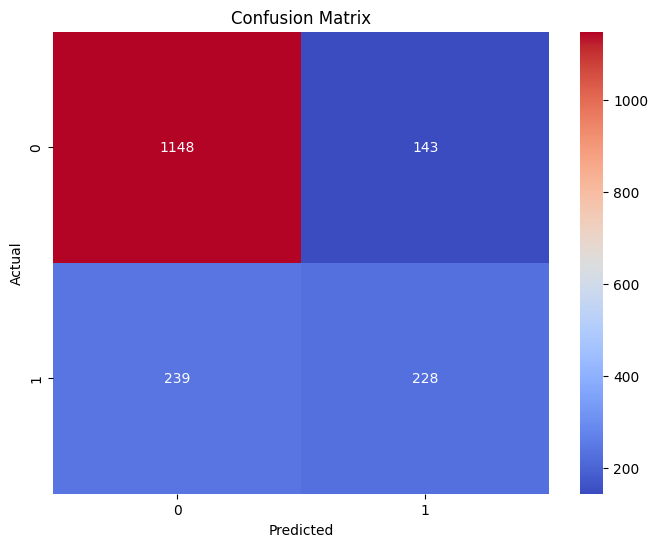

In [40]:
# Plotando Matriz de confusão com base nos dados de teste do Random Forest

from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
# Avaliando desempenho do Random Forest

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9986727341676147
Acurácia (Teste): 0.782707622298066
Acurácia Balanceada (Treino): 0.9979585686327679
Acurácia Balanceada (Teste): 0.6887279253338464
Precision (Treino): 0.9985704074338814
Precision (Teste): 0.6145552560646901
Recall (Treino): 0.9964336661911555
Recall (Teste): 0.48822269807280516
F1-Score (Treino): 0.997500892538379
F1-Score (Teste): 0.5441527446300716
ROCAUC (Treino): 0.9999061442626236
ROCAUC (Teste): 0.8165789512968218


In [42]:
# Importamos GridSearchCV para encontrar os melhores hiperparâmetros para o modelo de Random Forest

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}


grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [48]:
# Extraindo os melhores parâmetros

'''
dict = grid_search.best_estimator_.get_params()
print(dict)

or

'''

grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [49]:
# Adicionando os melhores parâmetros no Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_tunned =  RandomForestClassifier(bootstrap = True,
                                    ccp_alpha = 0.0,
                                    class_weight = None,
                                    criterion= 'gini',
                                    max_depth = 10,
                                    max_features= 'auto',
                                    max_leaf_nodes = None,
                                    max_samples = None,
                                    min_impurity_decrease = 0.0,
                                    min_samples_leaf = 1,
                                    min_samples_split = 2,
                                    min_weight_fraction_leaf = 0.0,
                                    n_estimators = 500,
                                    n_jobs = None,
                                    oob_score = False,
                                    random_state = None,
                                    verbose = 0,
                                    warm_start = False)
rf_tunned

RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=500)

In [50]:
# Treinando modelo com novos parâmetros

rf_tunned.fit(X_train, y_train)

<ipython-input-50-23d38da6abb7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tunned.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=500)

In [51]:
# Realizando previsões com o X_test usando os novos parâmetros

rf_tunned.predict(X_test)

array([0, 1, 0, ..., 1, 1, 0])

In [52]:
# Atribui as previsões e os dados de teste

X_test.assign(churn = y_test).assign(label = rf_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
1822,0.0,0.619718,0.324876,0.267142,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
3075,0.0,0.014085,0.060199,0.002267,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1
5116,0.0,0.338028,0.018408,0.053918,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
683,0.0,0.000000,0.525871,0.006035,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1
3535,0.0,0.676056,0.222886,0.236782,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201,0.0,0.070423,0.017413,0.010432,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
701,0.0,0.394366,0.663184,0.288184,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
5540,0.0,0.028169,0.792537,0.034214,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
6541,0.0,0.281690,0.874129,0.257460,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1


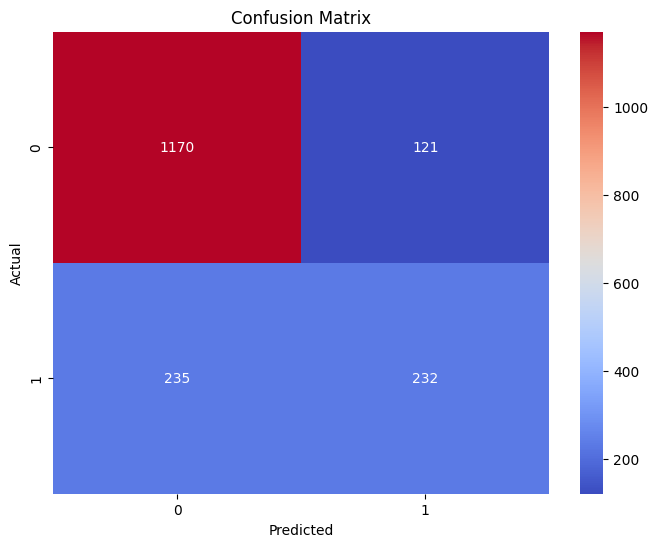

In [55]:
# Plotando Matriz de confusão com base nos dados de teste de Random Forest com parâmetros ajustados

from sklearn.metrics import confusion_matrix

y_pred = rf_tunned.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [53]:
# Avaliando desempenho do Random Forest com parâmetros ajustados

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8801668562760713
Acurácia (Teste): 0.7974971558589306
Acurácia Balanceada (Treino): 0.8223829446717204
Acurácia Balanceada (Teste): 0.7015311073035693
Precision (Treino): 0.8235294117647058
Precision (Teste): 0.6572237960339944
Recall (Treino): 0.6990014265335235
Recall (Teste): 0.49678800856531047
F1-Score (Treino): 0.7561728395061729
F1-Score (Teste): 0.5658536585365854
ROCAUC (Treino): 0.955662789138303
ROCAUC (Teste): 0.8386167123074091
